In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sys
from decimal import *

## Error Definitions

Following is an example for the concept of absolute error, relative error and decimal precision:

We shall test the approximation to common mathematical constant, $e$. Compute the absolute and relative errors along with the decimal precision if we take the approximate value of $e = 2.718$.

In [11]:
# We can use the formulas you derieved above to calculate the actual numbers

# CODE HERE - Make sure to print out the results
a = np.exp(1)
e = 2.718
abs_error = np.absolute((a - e) / e)
print np.absolute(a - e)
print abs_error
print "decimal precision is 12"

0.000281828459045
0.000103689646448
decimal precision is 12


## Model Error

Model error arises in various forms, here we are gonna take some population data and fit two different models and 
analyze which model is better for the given data.  Take a look at the code below and comment on the results.

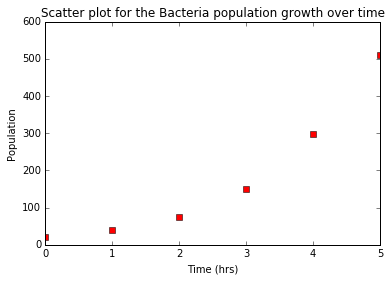

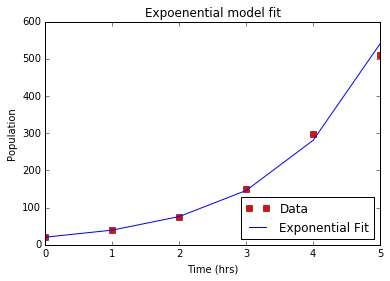

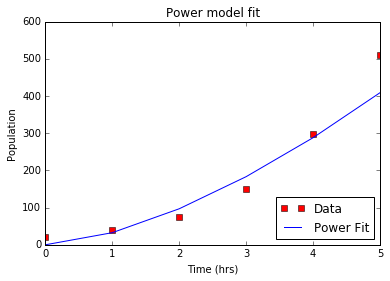

In [12]:
# Model Error
time = [0, 1, 2, 3, 4, 5] # hours
growth = [20, 40, 75, 150, 297, 510] # Bacteria Population

time = np.array(time)
growth = np.array(growth)

# First we can just plot the data to visualize it
plt.plot(time,growth,'rs')
plt.title("Scatter plot for the Bacteria population growth over time")
plt.xlabel('Time (hrs)')
plt.ylabel('Population')
plt.show()

# Now we can use the Exponential Model, y = ab^x, to fit the data
a = 20.5122; b = 1.9238;
y = a*b**time[:]
plt.plot(time,growth,'rs',time,y,'-b')
plt.title("Expoenential model fit")
plt.xlabel('Time (hrs)')
plt.ylabel('Population')
plt.legend(["Data", "Exponential Fit"], loc=4)
plt.show()

# Now we can use the Power Model, y = ax^b, to fit the data
a = 32.5846; b = 1.572;
y = a*time[:]**b
plt.plot(time,growth,'rs',time,y,'-b')
plt.title("Power model fit")
plt.xlabel('Time (hrs)')
plt.ylabel('Population')
plt.legend(["Data", "Power Fit"], loc=4)
plt.show()

Comments: Exponential model is better since it fits the data more accurate. The reason might be the population won't be 0 at the start point, which is indicated by the power model.

## Machine Epsilon

Machine epsilon is a very important concept in floating point error. The value, even though small, can easily compound over a period to cause huge problems.

Below we see a problem demonstrating how easily machine error can creep into a simple piece of code.  Play with different ways to compute this and see what happens

In [13]:
a = 4.0/3.0
b = a - 1.0
c = 3.0 * b
eps = 1.0 - c
print 'Value of a is %s' % a
print 'Value of b is %s' % b
print 'Value of c is %s' % c
print 'Value of epsilon is %s' % eps

Value of a is 1.33333333333
Value of b is 0.333333333333
Value of c is 1.0
Value of epsilon is 2.22044604925e-16


Ideally `eps` should be 0, but instead we see the machine epsilon and while the value is small it can lead to issues.  Write a loop that multiplies the value `c` above by 10 and see how the error propagates.

In [14]:
for i in range(1, 5):
    a = a * 10
    b = b * 10
    c = c * 10
    eps = 1.0 * 10**i - c

    print c
    print eps

10.0
1.7763568394e-15
100.0
1.42108547152e-14
1000.0
1.13686837722e-13
10000.0
1.81898940355e-12


Comments: When c was multiplied by 10 for 4 times, it became 10, 100, 1000 and 10000 respectively. When we used 10, 100, 1000 and 10000 to minus corresponding c value, the ideal results should be 0. However, from the results above, we can see the machine epsilon became bigger and bigger.

## The largest floating point number
Use the system library to find the largest floating point value.  Now try to compute some things with this number and see what happens.

In [15]:
Max = np.finfo(float).max
print Max

Min = np.finfo(float).min
print Min

# Difference = Max - Min
# print Difference

#When I tried to use Max - Min, the result turn out to be inf. And get RuntimeWarning: overflow encountered in double_scalars

1.79769313486e+308
-1.79769313486e+308


## The smallest floating point number 
Do the same with the smallest number.

In [16]:
Min = np.finfo(float).min
Max = np.finfo(float).max
Sum = Min + Max

print Sum

0.0


## Truncation Error
Truncation error is a very common form of error you will keep seeing in the area of Numerical Analysis/Computing.

Here we will look at the classic Calculus example of the approximation $\sin(x) \approx x$ near 0. We can plot them together to visualize the approximation and also plot the error to understand the behavior of the truncation error.

First plot the error of the approximation to $\sin x$ with $x$ on the interval $[-pi, \pi]$.

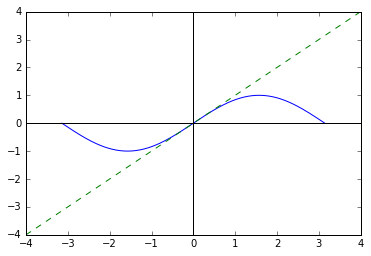

In [17]:
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
x = np.linspace(-np.pi, np.pi, 200)
plt.plot(x, np.sin(x))
axes.plot([-4,4], [-4,4], '--')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.show()


Now try the interval $[-0.5, 0.5]$

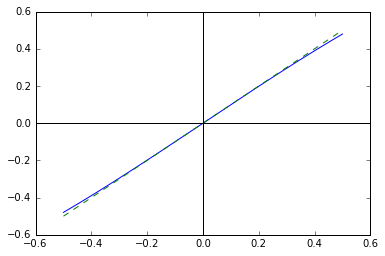

In [18]:
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
x = np.linspace(-0.5, 0.5, 200)
plt.plot(x, np.sin(x))
axes.plot(x, x, '--')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.show()

Now plot the absolute error

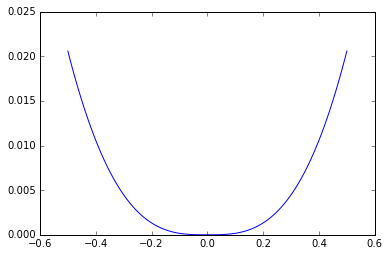

In [19]:
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
x = np.linspace(-0.5, 0.5, 100)
d = np.absolute(np.sin(x) - x) #d is the difference between np.sin(x) and x in interval [-0.5, 0.5]
plt.plot(x, d)
plt.show()

Finally the relative error.

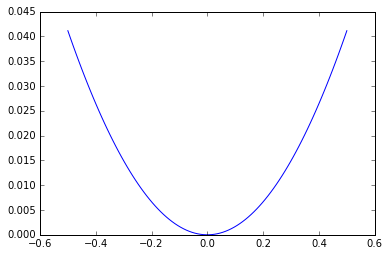

In [20]:
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
x = np.linspace(-0.5, 0.5, 100)
d = np.absolute(np.sin(x) - x)
relative_error = np.absolute(d/x)
plt.plot(x, relative_error)
plt.show()

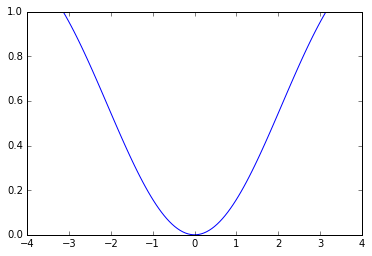

In [21]:
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
x = np.linspace(-np.pi, np.pi, 100)
d = np.absolute(np.sin(x) - x)
relative_error = np.absolute(d/x)
plt.plot(x, relative_error)
plt.show()